In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

In [1]:
travel = pd.read_excel('../data/0_2019.xlsx', index_col=0)
travel.head()

NameError: name 'pd' is not defined

In [4]:
travel1 = pd.pivot_table(travel, index='여행지', aggfunc=np.sum)
travel1.head()

,가을,가족,겨울,당일치기,뚜벅,먹거리,박,수목원,"숲,공원",알뜰하게,여름,우정,즐거운,차박/캠핑,체험,코스,핑크뮬리,혼자,힐링
여행지,,,,,,,,,,,,,,,,,,,
가평,1.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
강릉,0.0,2.0,4.0,2.0,0.0,1.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,0.0,0.0,0.0
강원도,4.0,8.0,1.0,8.0,0.0,2.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,2.0,1.0,17.0,0.0,0.0,1.0
강화도,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,0.0,0.0,2.0
거제,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0


In [5]:
from sklearn import preprocessing

col = ['코스', '혼자', '가족', '우정', '여름', '가을', '겨울', '핑크뮬리', '힐링', '수목원', '숲,공원', '박', '당일치기', '뚜벅', '체험', '먹거리', '차박/캠핑', '알뜰하게']

x = travel1[col].values
min_max_scaler = preprocessing.MinMaxScaler() #MinMaxScaler값을 0과 1사이로

x_scaled = min_max_scaler.fit_transform(x.astype(float))
travel1_norm = pd.DataFrame(x_scaled, columns =col, index = travel1.index)
travel1_norm.head()

,코스,혼자,가족,우정,여름,가을,겨울,핑크뮬리,힐링,수목원,"숲,공원",박,당일치기,뚜벅,체험,먹거리,차박/캠핑,알뜰하게
여행지,,,,,,,,,,,,,,,,,,
가평,0.028571,0.0,0.00,0.0,0.0,0.083333,0.000000,0.0,0.5,1.0,0.142857,0.000000,0.125,0.0,0.0,0.00,0.0,0.0
강릉,0.342857,0.0,0.25,0.0,0.0,0.000000,0.266667,0.0,0.0,0.0,0.285714,0.111111,0.250,0.0,1.0,0.25,0.0,0.0
강원도,0.485714,0.0,1.00,0.0,1.0,0.333333,0.066667,0.0,0.5,0.0,0.142857,0.055556,1.000,0.0,1.0,0.50,1.0,0.0
강화도,0.171429,0.0,0.00,0.0,0.0,0.000000,0.000000,0.0,1.0,0.0,0.000000,0.000000,0.250,0.0,1.0,0.00,0.0,0.0
거제,0.114286,0.0,0.00,0.0,0.0,0.083333,0.000000,0.0,0.0,0.0,0.142857,0.055556,0.000,0.0,0.0,0.25,0.0,0.0


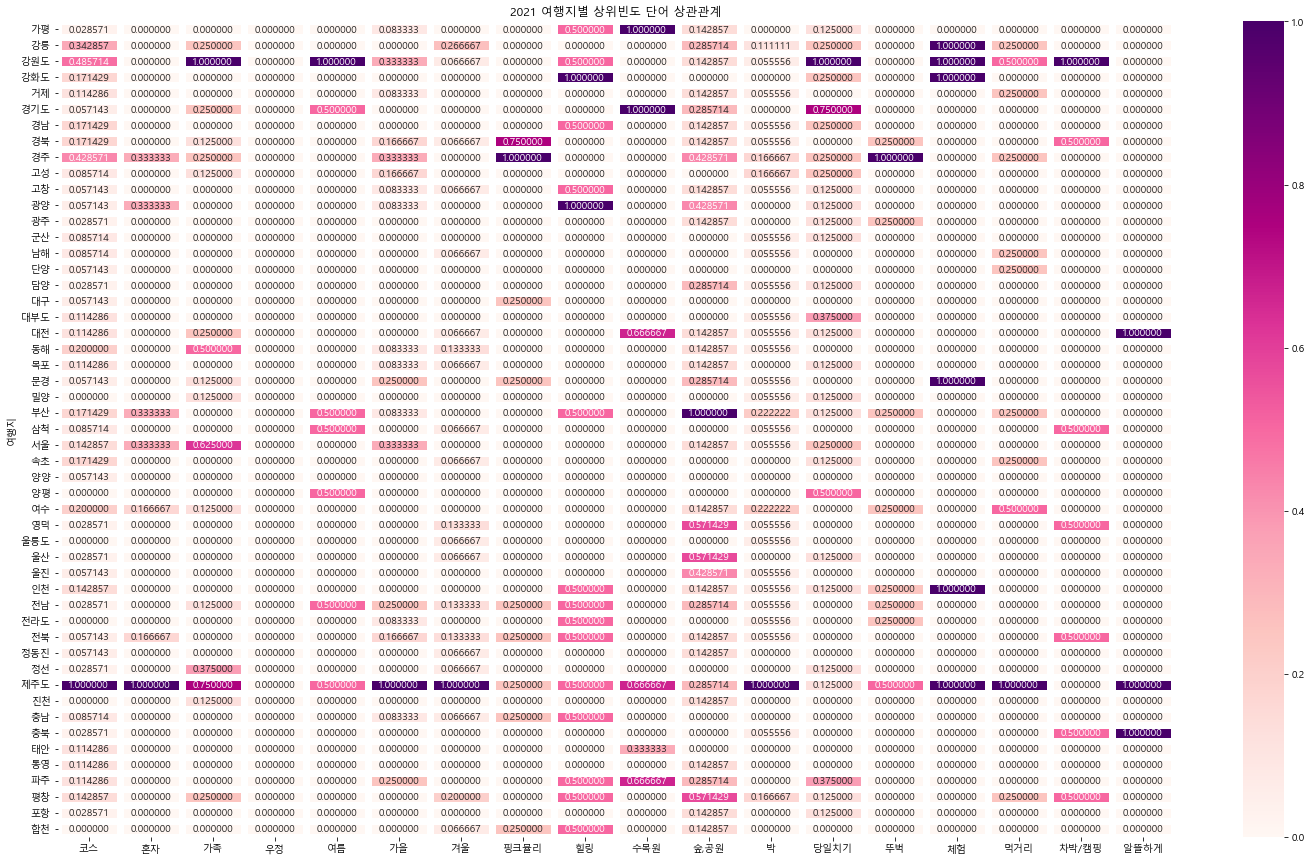

In [7]:
target_col = ['코스', '혼자', '가족', '우정', '여름', '가을', '겨울', '핑크뮬리', '힐링', '수목원', '숲,공원', '박', '당일치기', '뚜벅', '체험', '먹거리', '차박/캠핑', '알뜰하게']

plt.figure(figsize = (25,15))
sns.heatmap(travel1_norm[target_col], annot=True, fmt='f',
            linewidths=7, cmap='RdPu') #cmap='RdPu' 칼라RdYlGn_r
plt.title('2021 여행지별 상위빈도 단어 상관관계')
plt.show()